In [254]:
import pandas as pd
from matplotlib import pyplot as plt
from statistics import mean
import os
import numpy

In [114]:
baseline_root = "Data/baseline/"
platoon_root = "Data/single_lane_platoon/"

baseline_dirlist = [ item for item in os.listdir(baseline_root) if os.path.isdir(os.path.join(baseline_root, item)) ]
platoon_dirlist = [ item for item in os.listdir(platoon_root) if os.path.isdir(os.path.join(platoon_root, item)) ]

baseline_tables = [] 
for d in baseline_dirlist:
    baseline_tables.append(pd.read_csv(baseline_root+"/"+str(d)+"/"+"data.csv", index_col=0))

platoon_tables = [] 
for d in platoon_dirlist:
    platoon_tables.append(pd.read_csv(platoon_root+"/"+str(d)+"/"+"data.csv", index_col=0))

In [115]:
lanes = pd.read_csv("Data/baseline/1631722405.0934498/lanes.csv", index_col=0)
lanes

,start_x,start_y,start_z,end_x,end_y,end_z
200 1,34.700912,187.568146,0.0,50.700909,187.575470,0.0
8 -1,45.853313,227.589844,0.0,45.850880,199.589844,0.0
8 1,41.853313,227.590179,0.0,41.850880,199.590179,0.0
0 -1,-3.370002,294.696808,0.0,-3.451271,200.699585,0.0
0 1,-7.369998,294.703156,0.0,-7.451271,200.700500,0.0
...,...,...,...,...,...,...
412 -1,-3.451601,199.239578,0.0,-3.455214,183.239578,0.0
426 -1,-3.451601,199.239578,0.0,2.057170,191.553177,0.0
433 1,-7.451601,199.240494,0.0,2.036500,187.553177,0.0
437 1,3.399082,191.553802,0.0,-7.455488,182.021988,0.0


In [116]:
def length(x1,y1,z1,x2,y2,z2):

    dst = ((x1-x2)**2+(y1-y2)**2+(z1-z2)**2)**0.5
    return dst 

In [117]:
lengths = {}
for index, row in lanes.iterrows():
    lengths[index] = length(row["start_x"],row["start_y"],row["start_z"],row["end_x"],row["end_y"],row["end_z"])

In [257]:
tables = {"Benchmark":baseline_tables, "Single-lane platoon":platoon_tables}

In [258]:
def produce_map():
    
    percent = {}
    m = 0
    for name, table in tables.items():
        percent[name] = []
        data = []
        for k, row in lanes.iterrows():
            
            #percentage of road taken up
            total = 0
            for x in range(len(table)):
                total += table[x][k].mean()
            p = (total/len(table))/lengths[k]
            percent[name].append(p)
            if max(percent[name]) >= m:
                m = max(percent[name]) 
            #Layout of map
            df = pd.DataFrame(columns=["x","y"])
            df.loc[0] = [row["start_x"],row["start_y"]]
            df.loc[1] = [row["end_x"],row["end_y"]]
            data.append(df)
    colors = {}
    for name, table in tables.items():
        colors[name] = []
        for x in range(len(percent[name])):
            v = percent[name][x]/m
            if v >= 0.7:
                colors[name].append((0.8,0,0))
            if v <= 0.3:
                colors[name].append((0,0.8,0))
            else:
                colors[name].append((0.8,0.8,0))
    
    for name, table in tables.items():
        color = percent[name]
        plt.figure(figsize=[10,10])
        plt.title(name+" heatmap : Volume-to-Capacity", fontsize=20)
        plt.xlim([-20, 200])
        x = 0
        for d in data:
            #hue1 = color[x]
            #hue2 = 1 - m - color[x]
            #print(color[x])
            plt.plot(d["x"],d["y"], color=colors[name][x])
            x += 1
        plt.show()

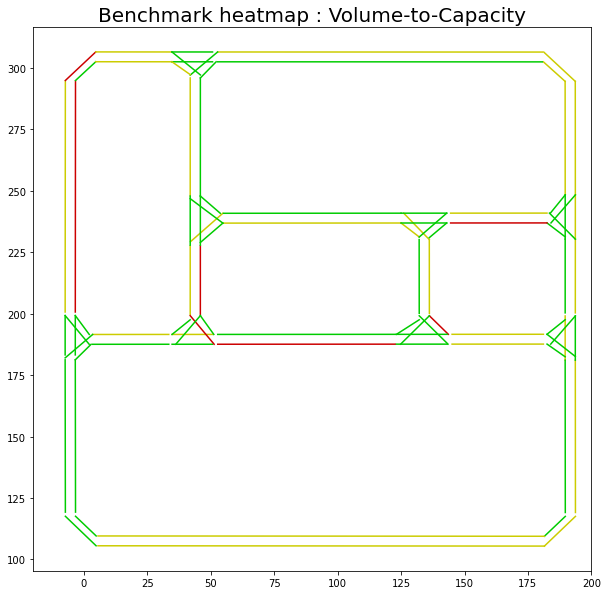

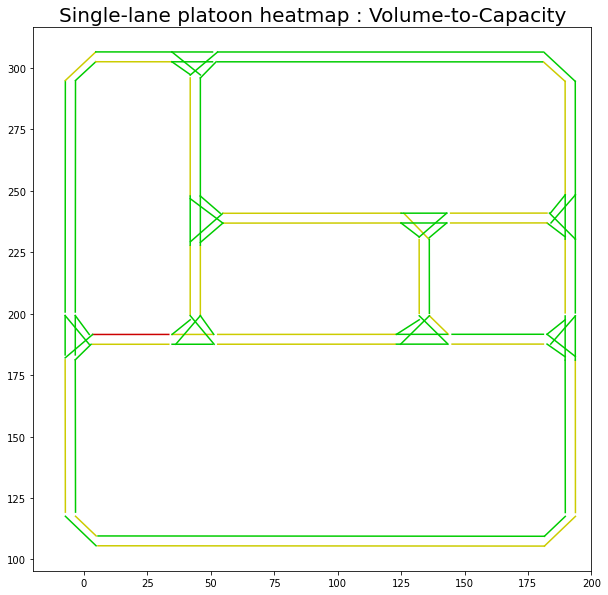

In [259]:
produce_map()

In [255]:
def produce_time_graph():
    plt.figure(figsize=[10,10])
    plt.title("Volume-to-Capacity percentage over time", fontsize=20)
    plt.xlim([0, 120])
    plt.xlabel('Time in seconds', fontsize=16)
    plt.ylabel('Percentage %', fontsize=15)
    print(list(tables.keys()))
    for name, table in tables.items():
        avg_percent = []
        #Index for each second of simulation
        total_percent = [0 for x in range(len(table[0]))]
        #For each row get the total volume/capacity
        for t in table:
            for k, row in t.iterrows():
                for x in range(len(row)):
                    if row[x] !=0:
                        taken = row[x]/lengths[row.index[x]]
                        total_percent[k] += taken
        
        for x in range(len(total_percent)):
            total_percent[x] = total_percent[x]/len(table)
        #get average percetnage

        avg_percent =[(x/len(table[0]))*100 for x in total_percent]
        plt.plot(avg_percent)
        print(name)
        print("standard deviation", numpy.std(avg_percent))
        print("mean", mean(avg_percent))
        print("Max", max(avg_percent))
        print("Min", min(avg_percent))
    plt.legend(list(tables.keys()))

['Baseline', 'Single-lane platoon']
Baseline
standard deviation 0.7590175657895322
mean 7.640938506903433
Max 8.805882471915897
Min 5.245090714749658
Single-lane platoon
standard deviation 0.5147024500566664
mean 6.634353062535587
Max 7.814081867133379
Min 4.894501699860767


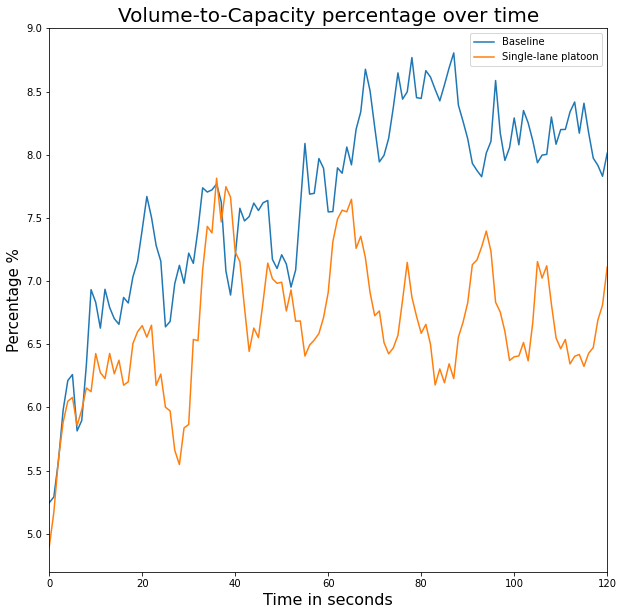

In [256]:
produce_time_graph()